## Assignment 4 <br>
Weekly assignment 4: machine learning <br>
Gracie Becongco <br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize  


In [2]:
dfile='HR-Employee-Attrition.csv'
csv=pd.read_csv(dfile)
df1=pd.DataFrame(csv)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Introduction: describe which dataset and variables you selected and why <br>

                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014 

<AxesSubplot:>

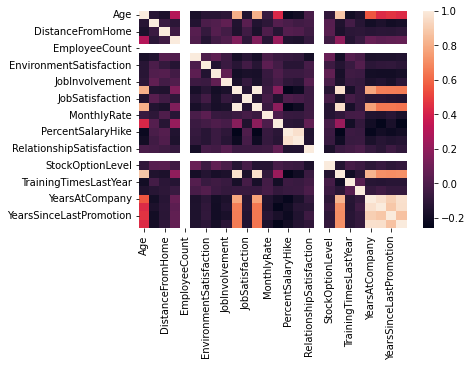

In [3]:
# check correlation of data
df1_corr=df1.corr()
df1_corr_index=df1_corr.index
print(df1_corr)
print(df1_corr_index)
sns.heatmap(df1_corr[df1_corr_index].corr())

In [4]:
df=df1[['Age','Attrition','JobLevel','MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']].copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   JobLevel                 1470 non-null   int64 
 3   MonthlyIncome            1470 non-null   int64 
 4   TotalWorkingYears        1470 non-null   int64 
 5   YearsAtCompany           1470 non-null   int64 
 6   YearsInCurrentRole       1470 non-null   int64 
 7   YearsSinceLastPromotion  1470 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 92.0+ KB


,Age,Attrition,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,2,5993,8,6,4,0
1,49,No,2,5130,10,10,7,1
2,37,Yes,1,2090,7,0,0,0
3,33,No,1,2909,8,8,7,3
4,27,No,1,3468,6,2,2,2


The following 7 columns were selected based on correlation data (attrition column will be included as we are predicting that column): <br>
1.) Age <br>
2.) JobLevel <br>
3.) MonthlyIncome <br>
4.) TotalWorkingYears <br>
5.) YearsAtCompany <br>
6.) YearsInCurrentRole <br>
7.) YearsSinceLastPromotion <br>

Data cleaning: <br>
Convert Attrition column from Yes/No to 0/1 (0: No, 1: Yes) <br>

In [5]:
df = df.replace({'Attrition': {'Yes': 1, 'No': 0}})
df.head()

,Age,Attrition,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,1,2,5993,8,6,4,0
1,49,0,2,5130,10,10,7,1
2,37,1,1,2090,7,0,0,0
3,33,0,1,2909,8,8,7,3
4,27,0,1,3468,6,2,2,2


In [6]:
df.isnull().sum()

Age                        0
Attrition                  0
JobLevel                   0
MonthlyIncome              0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
dtype: int64

Exploratory data analysis: present relevant grahs and tables with respect to your problem

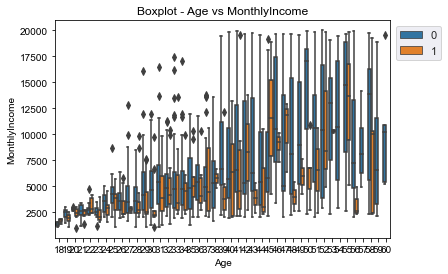

In [7]:
a = sns.boxplot(x="Age", y="MonthlyIncome", hue="Attrition", data=df)
sns.set(rc={"figure.figsize":(17, 13)}) 
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("Age")
plt.ylabel("MonthlyIncome")
plt.title('Boxplot - Age vs MonthlyIncome')
plt.show(a)

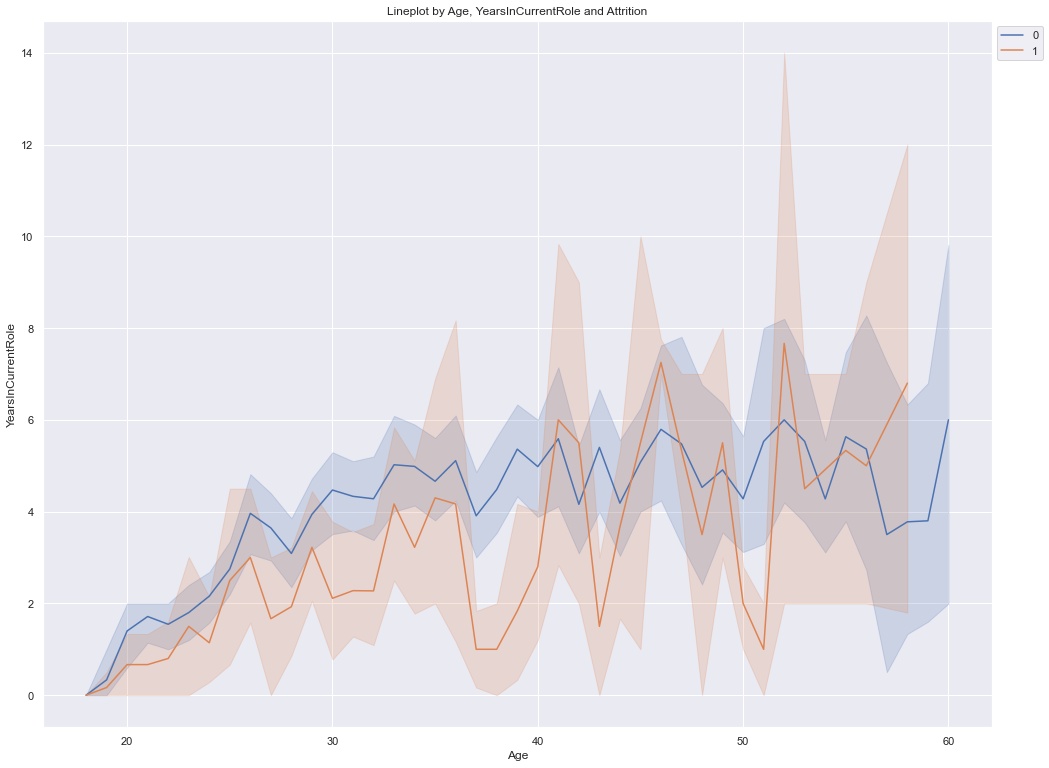

In [8]:
sns.lineplot(x="Age", y="YearsInCurrentRole",hue="Attrition", data=df)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('Lineplot by Age, YearsInCurrentRole and Attrition')
plt.xlabel("Age")
plt.ylabel("YearsInCurrentRole")
plt.show()

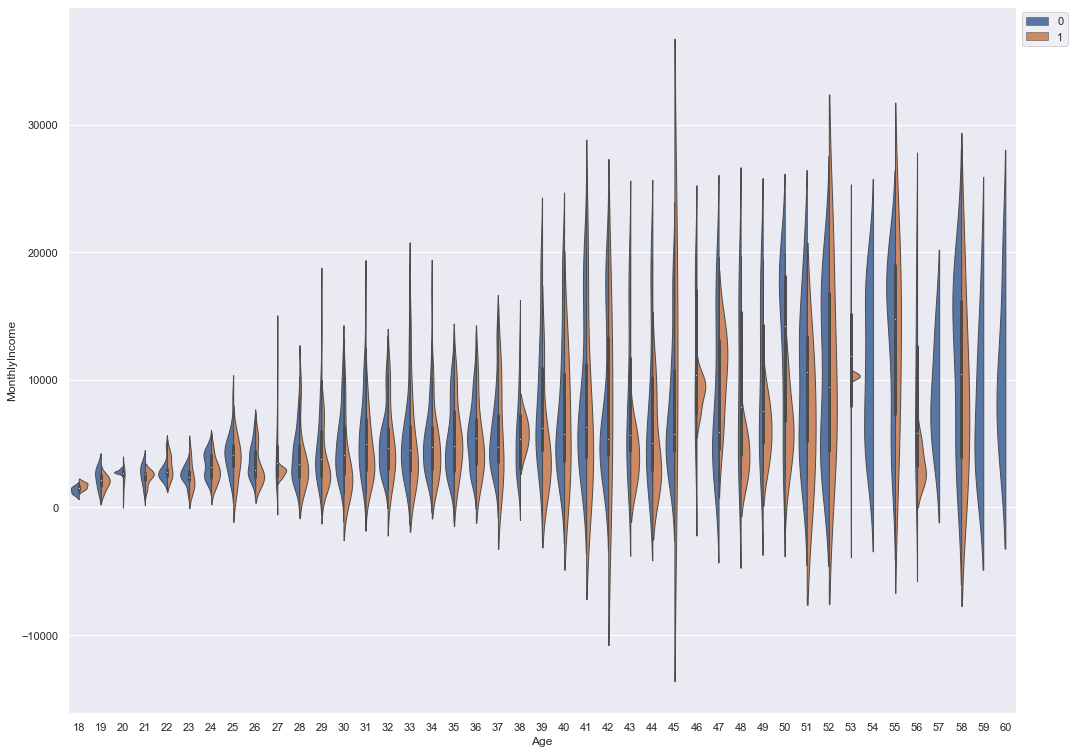

In [9]:
sns.violinplot(data=df, x="Age", y="MonthlyIncome", hue="Attrition",split=True, linewidth=1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel("Age")
plt.ylabel("MonthlyIncome")
plt.show()

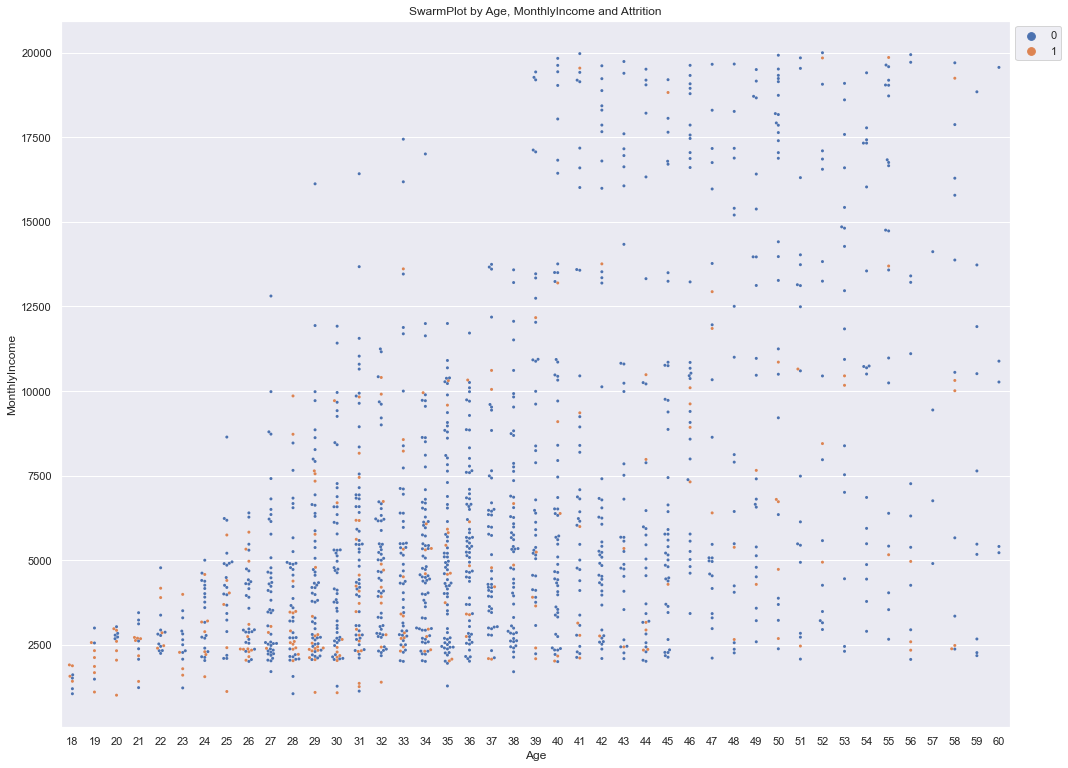

In [10]:
e = sns.swarmplot(x="Age", y="MonthlyIncome", hue="Attrition", size=3, data=df)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('SwarmPlot by Age, MonthlyIncome and Attrition')
plt.xlabel("Age")
plt.ylabel("MonthlyIncome")
plt.show(e)

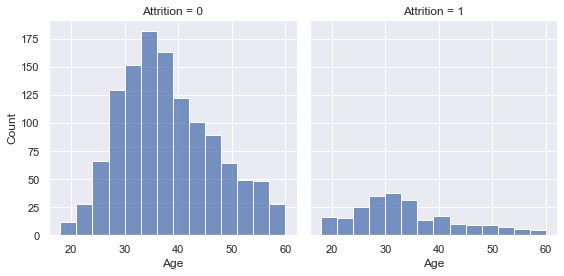

In [11]:
sns.displot(df, x="Age", col="Attrition", binwidth=3, height=4, facet_kws=dict(margin_titles=True), )
plt.xlabel("Age")
plt.ylabel("Attrition")
plt.show()

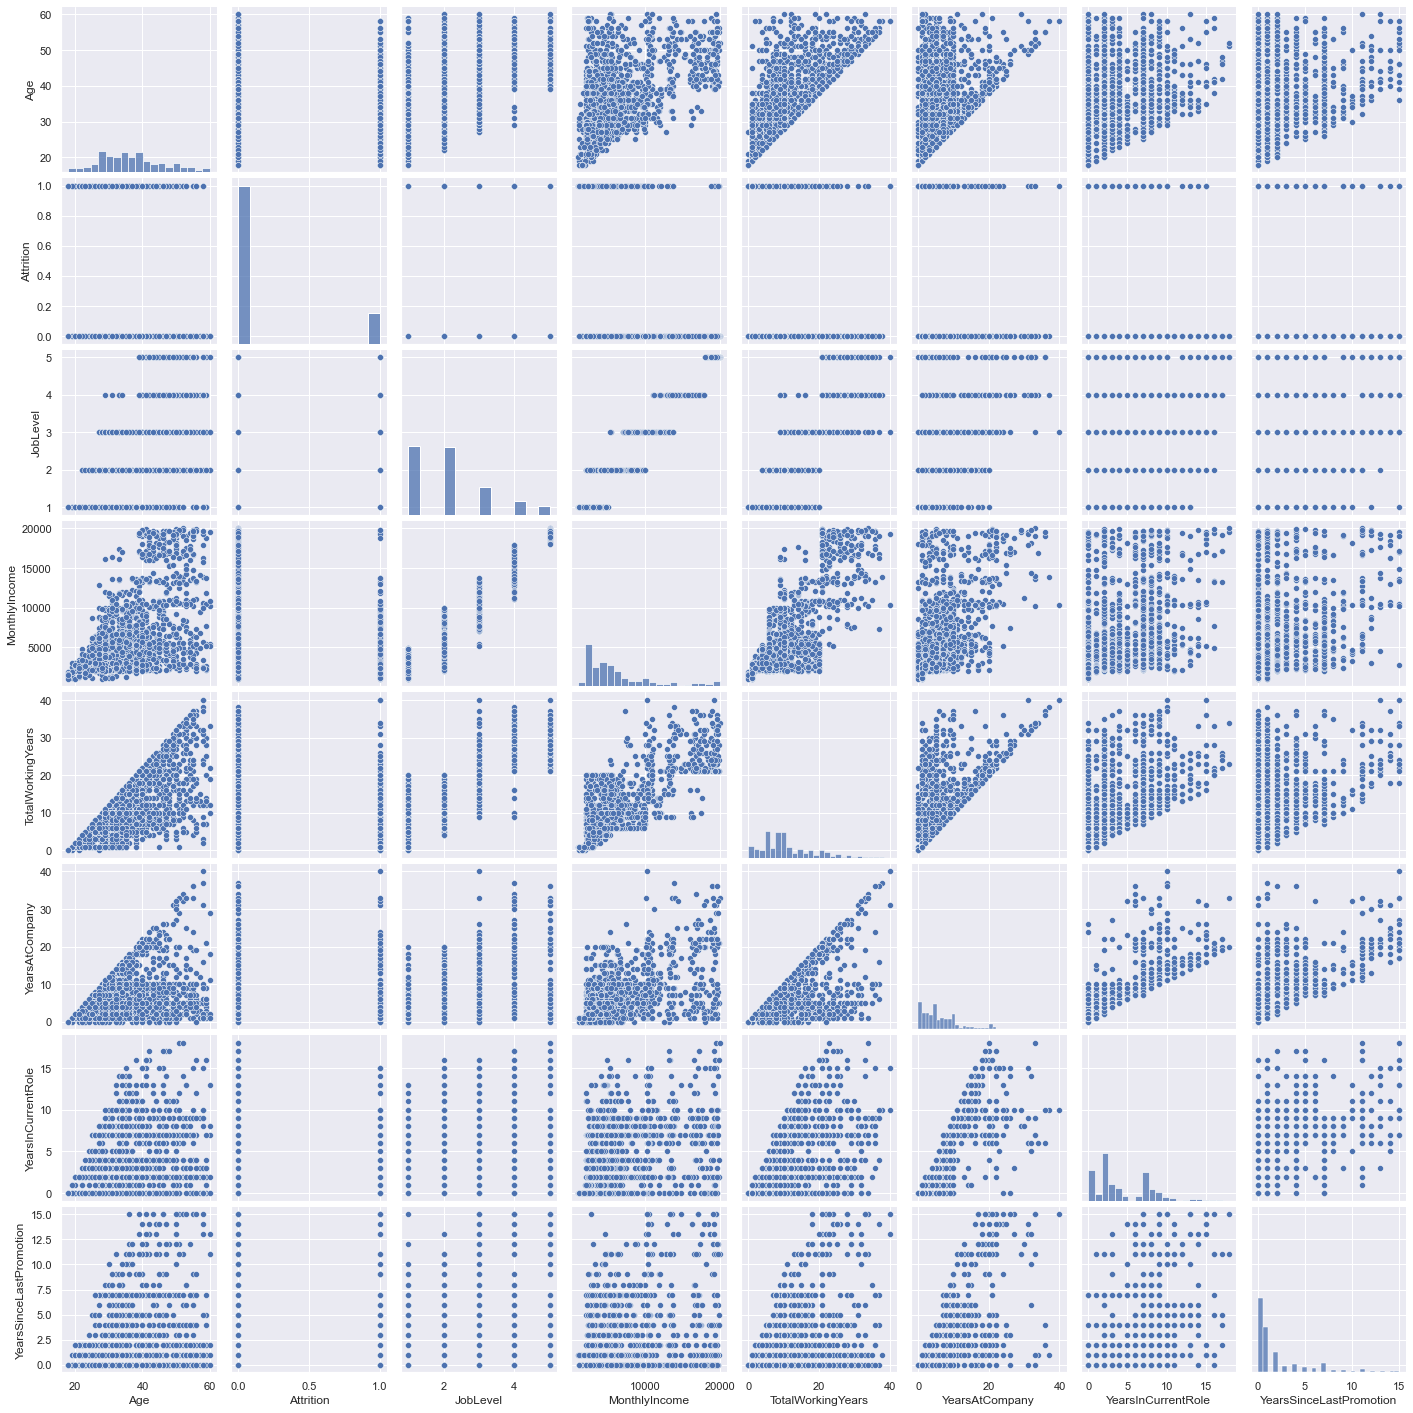

In [12]:
sns.pairplot(df)
plt.show()

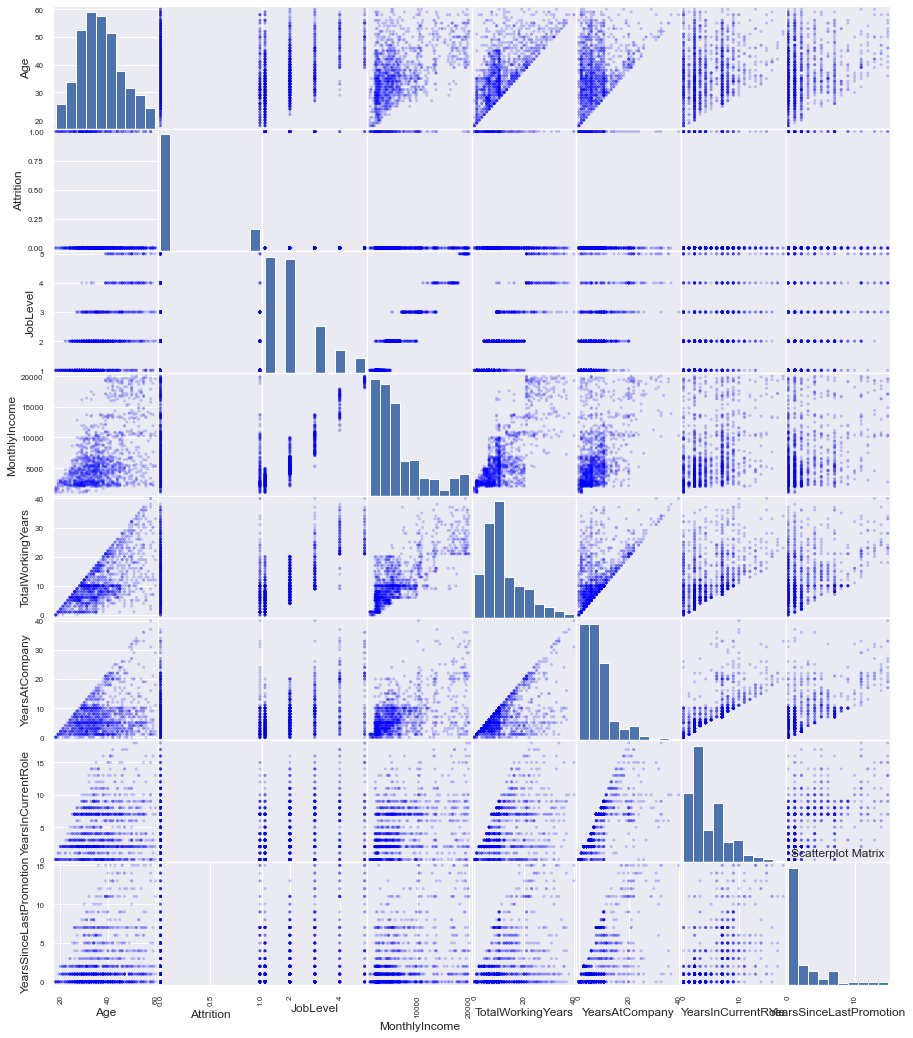

In [13]:
pd.plotting.scatter_matrix(df, color='blue', diagonal='hist', figsize=(15,18), alpha=0.2, grid=True)
plt.title('Scatterplot Matrix')
plt.show()

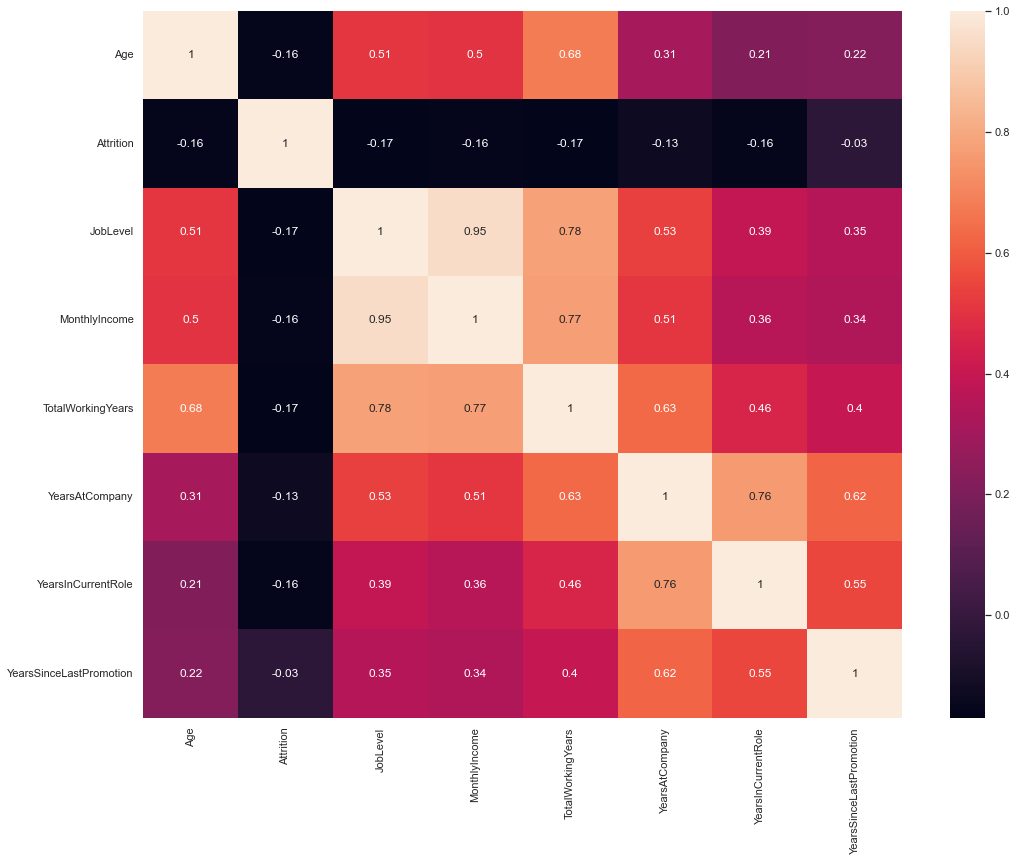

In [14]:
df_corr_matrix = df.corr().round(2)  
sns.heatmap(df_corr_matrix, annot=True)
plt.show()

Splitting data into test and train data with 30% set as the test data

In [15]:
X = df.drop('Attrition', axis=1)
X = normalize(X)
y = df['Attrition'].astype(int)
target_names = ['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=1)

Choosing KNN <br>
K-nearest neighbor is a supervised learning algorithm used to solve classification and regression problems.<br>
For our particular case, we are trying to predict attrition (either a yes or no classification). <br>
KNN will store all the related data and predict attrition based on the similarity of the new data with stored data. It basically will classify new data based on how its neighbors are classified


Identifying best n_neighbors parameter based on error rate

In [16]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

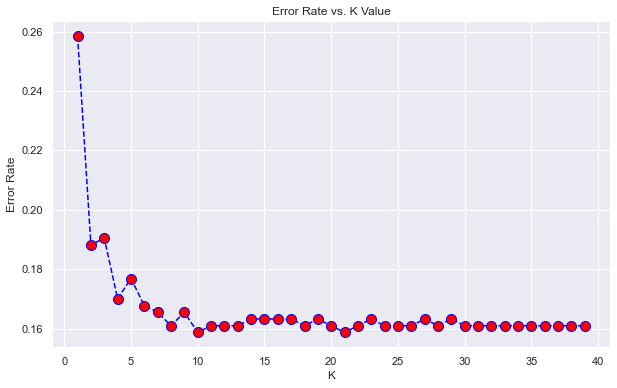

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
knn = KNeighborsClassifier(n_neighbors=10)  
knn = knn.fit(X_train, y_train)            # fit the k-nearest neigbor model with the train data
kscore = knn.score(X_test, y_test)                  # calculate the fit on the test data
print('KNN fit score of test data is '+str(kscore))

KNN fit score of test data is 0.8412698412698413


Score is 84% implying that the model will predict attrition accurately by 84%.

In [19]:
y_test_pred = knn.predict(X_test)  
cm = confusion_matrix(y_test, y_test_pred)  
cm

array([[368,   2],
       [ 68,   3]])

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       370
           1       0.60      0.04      0.08        71

    accuracy                           0.84       441
   macro avg       0.72      0.52      0.50       441
weighted avg       0.80      0.84      0.78       441



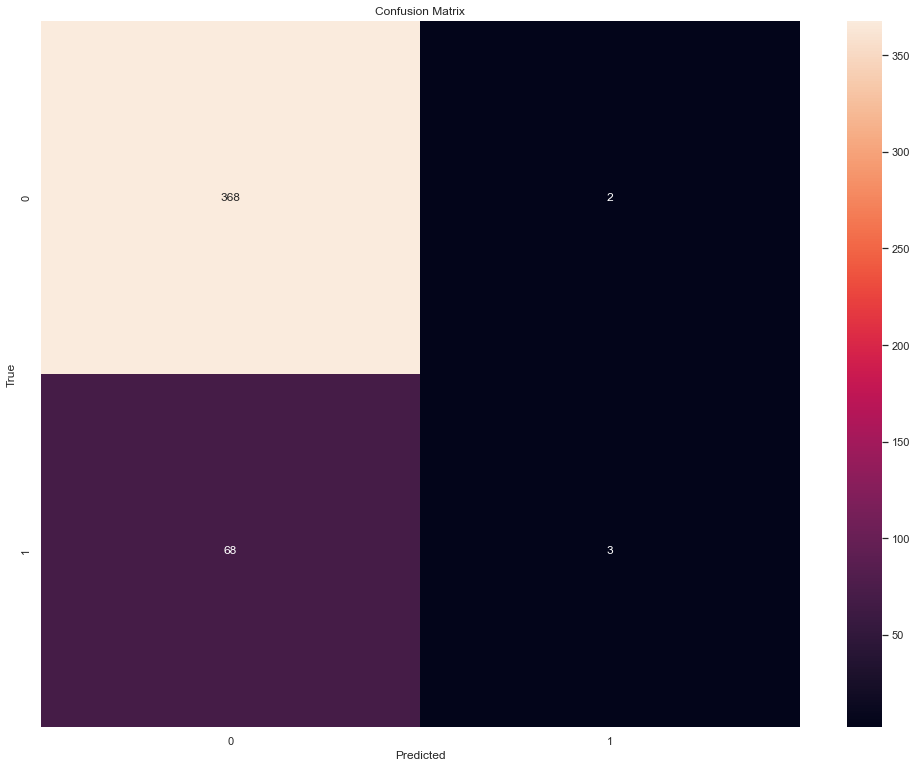

In [20]:
matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test,y_test_pred))

Weighted Average Precision is 80% implying that 80% of predicted Attrition is correctly predicted <br>
Weighted Average Recall is 84% implying that 84% of actual Attrition is predicted correctly

In [21]:
from math import sqrt
test_preds = knn.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print('MSE/RMSE for test data. \n')
print('MSE: '+str(round(mse,5))+', RMSE: '+ str(round(rmse,5)))

MSE/RMSE for test data. 

MSE: 0.15873, RMSE: 0.39841


Values above indicates that the current KNN Model is off by 0.1587 when predicting attrition with the test data.<br>
While the RMSE value indicates that the current KNN model is typically off by 0.3984